# Dataset Analysis

In [1]:
import cv2
import numpy as np

np.set_printoptions(linewidth=200)
image_data = cv2.imread(
    "/home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images/train/0/0000.png"
)
image_data_unchanged = cv2.imread(
    "/home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images/train/0/0000.png",
    cv2.IMREAD_UNCHANGED,
)

In [2]:
print(f"""Data type of image_data: {type(image_data)} shape: {image_data.shape} dtype: {type(image_data[0][0][0])}
   image_data_unchanged: {type(image_data_unchanged)} shape: {image_data_unchanged.shape}    dtype: {type(image_data_unchanged[0][0])}""")

Data type of image_data: <class 'numpy.ndarray'> shape: (28, 28, 3) dtype: <class 'numpy.uint8'>
   image_data_unchanged: <class 'numpy.ndarray'> shape: (28, 28)    dtype: <class 'numpy.uint8'>


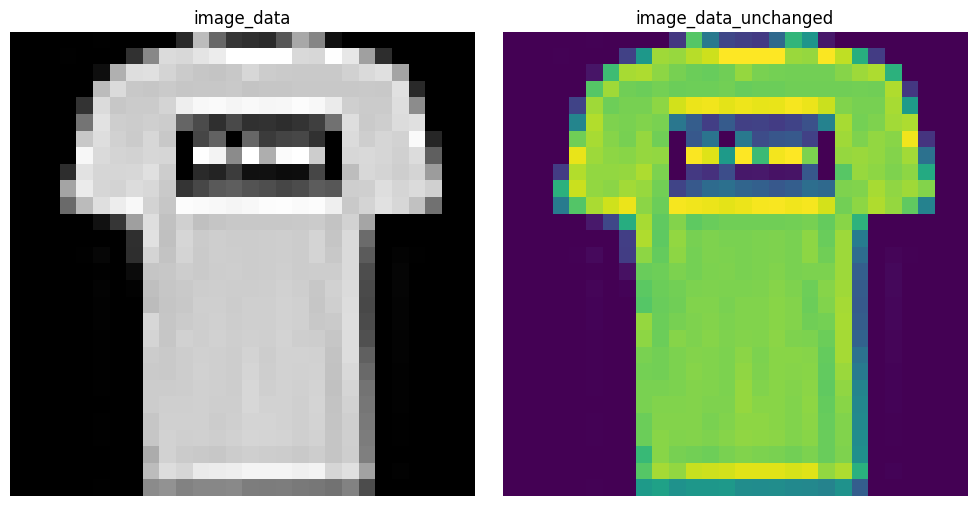

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_data)
axes[0].set_title("image_data")
axes[0].axis("off")

axes[1].imshow(image_data_unchanged)
axes[1].set_title("image_data_unchanged")
axes[1].axis("off")

plt.tight_layout()
plt.show()
print(image_data_unchanged)

# Dataset Preparation

In [4]:
import sys

print(*sys.path, sep="\n")

/home/keerthivasan_user/.local/share/uv/python/cpython-3.13.2-linux-x86_64-gnu/lib/python313.zip
/home/keerthivasan_user/.local/share/uv/python/cpython-3.13.2-linux-x86_64-gnu/lib/python3.13
/home/keerthivasan_user/.local/share/uv/python/cpython-3.13.2-linux-x86_64-gnu/lib/python3.13/lib-dynload

/home/keerthivasan_user/Documents/git/netweaver/.venv/lib/python3.13/site-packages
/home/keerthivasan_user/Documents/git/netweaver/src


In [1]:
from netweaver import create_data_mnist, download_fashion_mnist_dataset

## Download

In [2]:
project_root_path = "/home/keerthivasan_user/Documents/git/netweaver"
download_fashion_mnist_dataset(project_root_path)

Fashion_mnish_dataset is already available in /home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images


## Load into memory

In [3]:
dataset_path = (
    "/home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images"
)
X, y, X_test, y_test = create_data_mnist(dataset_path)

X shape:      (60000, 28, 28) dtype(<class 'numpy.uint8'>) mem usage: 0.044Gb used, y shape:      (60000,) dtype(<class 'numpy.uint8'>) mem usage: 0.000Gb used
X_test shape: (10000, 28, 28) dtype(<class 'numpy.uint8'>) mem usage: 0.007Gb used, y_test shape: (10000,) dtype(<class 'numpy.uint8'>) mem usage: 0.000Gb used


# Data Preprocessing

In [12]:
def min_max_values(X, X_test):
    X_min, X_max = X.min(), X.max()
    X_test_min, X_test_max = X_test.min(), X_test.max()
    print(f"X's      min: {X_min}, max:{X_max}")
    print(f"X_test's min: {X_test_min}, max:{X_test_max}")

## Scaling


In [13]:
import numpy as np


def scale_mopo(arr: np.ndarray, max_half: float):
    return (arr.astype(np.float32) - max_half) / max_half


def scale_zo(arr: np.ndarray, max_value):
    return arr.astype(np.float32) / max_value

In [14]:
min_max_values(X, X_test)

X's      min: 0, max:255
X_test's min: 0, max:255


In [15]:
Xtrain_max_half = X.max() / 2
X_strain = scale_mopo(X, Xtrain_max_half)
X_stest = scale_mopo(X_test, Xtrain_max_half)  # uses the same max_half value

In [16]:
min_max_values(X_strain, X_stest)

X's      min: -1.0, max:1.0
X_test's min: -1.0, max:1.0


## Flattening

In [17]:
X_sftrain = X_strain.reshape(X_strain.shape[0], X_strain.shape[1] * X_strain.shape[2])
X_sftest = X_stest.reshape(X_stest.shape[0], X_stest.shape[1] * X_stest.shape[2])
print(X_sftrain.shape)
print(X_sftest.shape)

(60000, 784)
(10000, 784)


## shuffle

In [18]:
import numpy as np

keys = np.array(range(X_sftrain.shape[0]))
np.random.shuffle(keys)
X_ssftrain = X_sftrain[keys]
y = y[keys]
print(y[:10])

[8 9 4 3 8 8 4 9 5 4]


# Model Architecture and Creation

In [25]:
from netweaver import (
    AccuracyCategorical,
    ActivationSoftmax,
    LayerDense,
    LossCategoricalCrossentropy,
    Model,
    OptimizerAdam,
)

In [26]:
model = Model()

In [27]:
model.add(LayerDense(n_inputs=X_ssftrain.shape[1], n_neurons=20))
model.add(ActivationSoftmax())
model.add(LayerDense(n_inputs=20, n_neurons=20))
model.add(ActivationSoftmax())
model.add(LayerDense(n_inputs=20, n_neurons=10))
model.add(ActivationSoftmax())

In [28]:
model.set(
    loss=LossCategoricalCrossentropy(),
    optimizer=OptimizerAdam(learning_rate=0.01, decay=0.001),
    accuracy=AccuracyCategorical(),
)

In [29]:
model.finalize()

In [30]:
model.train(
    X=X_ssftrain,
    y=y,
    epochs=2,
    batch_size=32,
    print_every=100,
    validation_data=None,
)

epoch: 1
step: 0         ,acc: 0.031     ,loss: 2.304     ,data_loss: 2.304     ,reg_loss: 0.000     ,lr: 0.0100000 
step: 100       ,acc: 0.156     ,loss: 2.293     ,data_loss: 2.293     ,reg_loss: 0.000     ,lr: 0.0090909 
step: 200       ,acc: 0.031     ,loss: 2.305     ,data_loss: 2.305     ,reg_loss: 0.000     ,lr: 0.0083333 
step: 300       ,acc: 0.062     ,loss: 2.304     ,data_loss: 2.304     ,reg_loss: 0.000     ,lr: 0.0076923 
step: 400       ,acc: 0.094     ,loss: 2.287     ,data_loss: 2.287     ,reg_loss: 0.000     ,lr: 0.0071429 
step: 500       ,acc: 0.062     ,loss: 2.300     ,data_loss: 2.300     ,reg_loss: 0.000     ,lr: 0.0066667 
step: 600       ,acc: 0.094     ,loss: 2.306     ,data_loss: 2.306     ,reg_loss: 0.000     ,lr: 0.0062500 
step: 700       ,acc: 0.062     ,loss: 2.311     ,data_loss: 2.311     ,reg_loss: 0.000     ,lr: 0.0058824 
step: 800       ,acc: 0.125     ,loss: 2.304     ,data_loss: 2.304     ,reg_loss: 0.000     ,lr: 0.0055556 
step: 900       ,ac